** Clean And Analyze Employee Exit Surveys **

In this project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. We will answer the questions: 

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction?

- Are long time employees resigning due to some kind of dissatisfaction?

- Are younger employees resigning due to some kind of dissatisfaction?

- Are older employees resigning due to some kind of dissatisfaction?


In [1277]:
import pandas as pd 
import numpy as np 

In [1278]:
dete_survey = pd.read_csv('dete_survey.csv'
                          , na_values = 'Not Stated')
tafe_survey = pd.read_csv('tafe_survey.csv'
                          , na_values = 'Not Stated')

In [1279]:
print(dete_survey.shape)

(822, 56)


In [1280]:
print(dete_survey.isnull().sum())

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [1281]:
print(dete_survey["Age"].value_counts(dropna=False))
print('\n')
print(dete_survey["Workload"].value_counts(dropna=False))
print('\n')
print(dete_survey["Job dissatisfaction"].
      value_counts(dropna=False))
print('\n')
print(dete_survey["Dissatisfaction with the department"].
      value_counts(dropna=False))

61 or older      222
56-60            174
51-55            103
46-50             63
41-45             61
26-30             57
36-40             51
21-25             40
31-35             39
NaN               11
20 or younger      1
Name: Age, dtype: int64


False    735
True      87
Name: Workload, dtype: int64


False    733
True      89
Name: Job dissatisfaction, dtype: int64


False    761
True      61
Name: Dissatisfaction with the department, dtype: int64


After observing the dete survey data, we have 56 columns and 822 entry. columns such as(bussinis unit, Aboriginal,Torris strait, South sea , and Disability) are majorly consist of na and therefore must be dropped. 

The age column consist of different categories. Each category is 5 years. There are 11 no entry values, we will explore them later and decide weather to drop them or not. 

There are a number of columns such as job satisfaction and dissatisfaction with the department that are true and false answers. 

In [1282]:
print(tafe_survey.shape)

(702, 72)


In [1283]:
print(tafe_survey.isna().sum())

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

In [1284]:
print(tafe_survey['CurrentAge. Current Age']
      .value_counts(dropna= False))
print('\n')
print(tafe_survey['Contributing Factors. Dissatisfaction']
      .value_counts(dropna= False))
print('\n')
print(tafe_survey['CESSATION YEAR']
      .value_counts(dropna= False))
print('\n')
print(tafe_survey['Reason for ceasing employment']
      .value_counts(dropna= False))

56 or older      162
NaN              106
51-55             82
41  45            80
46  50            59
31  35            52
36  40            51
26  30            50
21  25            44
20 or younger     16
Name: CurrentAge. Current Age, dtype: int64


-                                         371
NaN                                       265
Contributing Factors. Dissatisfaction      66
Name: Contributing Factors. Dissatisfaction, dtype: int64


 2011.0    268
 2012.0    235
 2010.0    103
 2013.0     85
NaN          7
 2009.0      4
Name: CESSATION YEAR, dtype: int64


Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: Reason for ceasing employment, dtype: int64


After observing the tafe survey data, we have 72 columns and 702 entry. Tafe consist of more columns than dete survey. Thefere, we need more exploring to understand the nature of the columns, some columns consits of -, we will need to undertand it more.

It was also noted that The column names in the tafe survey are more complex and need to be cleanned.for example, CESSATION YEAR is an integer instead of date type. 

The CurrentAge. Current Age column consist of different categories. Each category is 5 years. There are 106 no entry values, we will explore them later and decide weather to drop them or not.

In [1285]:
tafe_survey.iloc[0:3,0:15]

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-


To make the analysis smoother, we will drop all the columns that we do not need from both surveys.

In [1286]:
dete_survey_updated = dete_survey.drop(dete_survey
                                       .columns[28:49], axis = 1)

In [1287]:
tafe_survey_updated = tafe_survey.drop(tafe_survey
                                      .columns[17:66], axis =1)

In [1288]:
dete_survey_updated.columns =(dete_survey_updated
                             .columns
                             .str.replace(' ', '_')
                             .str.strip()
                             .str.lower())
print(dete_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


In [1289]:
tafe_survey_updated=tafe_survey_updated.rename({'Record ID': 'id',
                           'CESSATION YEAR': 'cease_date',
                           'Reason for ceasing employment': 'separationtype',
                           'Gender. What is your Gender?': 'gender',
                           'CurrentAge. Current Age': 'age',
                           'Employment Type. Employment Type': 'employment_status',
                           'Classification. Classification': 'position',
                           'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                           'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}, axis =1)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

We cleaned up the column name in both data set, replaced some column names, unified the column names in both dataset so that we could combine them and analyze one data set with allof the information. 

** declaring what data we want from the datasets and droping the rest**

If we look at the unique values in the separationtype columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string 'Resignation'.

in the tafe survey, we have one category of Resignation. On the other hand, we have multiple Resignation types in dete survey. 

In [1290]:
print(dete_survey_updated['separationtype']
      .value_counts())
print('\n')
print(tafe_survey_updated['separationtype']
      .value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [1291]:
resignation = tafe_survey_updated['separationtype'] == 'Resignation' 
tafe_resign = tafe_survey_updated[resignation].copy()

In [1292]:
pattern = r"[Rr]esignation"
resignation2 = (dete_survey_updated['separationtype']
               .str.contains(pattern))
dete_resign = dete_survey_updated[resignation2].copy()

Now we created two new dataframes, dete_resign and tafe_resign, which only includes information about employees who choose to resign. Just to make both data frames look thae same, we will seperate the string at the seperation colum in dete_resign and keep the first world.

In [1293]:
dete_resign['separationtype'] = (dete_resign['separationtype']
                                 .str.split('-')
                                 .str[0])
dete_resign['separationtype'].value_counts()

Resignation    311
Name: separationtype, dtype: int64

One of the crucial points in this project is to know how long the emplyee lasted before resigning. The columns cease_date and dete_start_date makes sense before we start analyzing.

Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data.

In [1294]:
dete_resign['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
07/2012      1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

In [1295]:
dete_resign['cease_date']=(dete_resign['cease_date']
                           .str.split('/')
                           .str[-1].astype("float"))

In [1296]:
dete_resign['cease_date'].value_counts().sort_index(ascending = True)

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [1297]:
dete_resign['dete_start_date'].value_counts().sort_index(ascending = True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [1298]:
tafe_resign['cease_date'].value_counts().sort_index(ascending = True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

After inspecting the cease_date column in both dataframes and the dete_start_date in dete survey, it seems like all the dates are with in range. Nothing seems off or weird. 

The main question in this project revolves around knowing the length of time before resignning. 
in the dete_resign data frame, we have a column that represent the start date and a column that represent the end date. we will use these info to create a new column called "institute_service" which exists in the tafe datframe.

In [1299]:
dete_resign['institute_service'] = (dete_resign['cease_date'] - dete_resign['dete_start_date'])

In [1300]:
dete_resign[['cease_date','dete_start_date','institute_service']].head()

,cease_date,dete_start_date,institute_service
3,2012.0,2005.0,7.0
5,2012.0,1994.0,18.0
8,2012.0,2009.0,3.0
9,2012.0,1997.0,15.0
11,2012.0,2009.0,3.0


Next, we'll identify any employees who resigned because they were dissatisfied. we will pay attention to these columns going forwrd. 

- dafe_survey_updated:
job_dissatisfaction, dissatisfaction_with_the_department,physical_work_environment, lack_of_recognition, lack_of_job_security, work_location, employment_conditions, work_life_balance, workload

- tafe_survey_updated:
Contributing Factors. Dissatisfaction, Contributing Factors.Job Dissatisfaction.

** If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column**

- True: indicates a person resigned because they were dissatisfied in some way
- False: indicates a person resigned because of a reason other than dissatisfaction with the job
- NaN: indicates the value is missing

In [1301]:
print(tafe_resign['Contributing Factors. Dissatisfaction']
      .value_counts(dropna = False))
print('\n')
print(tafe_resign['Contributing Factors. Job Dissatisfaction']
      .value_counts(dropna = False))

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64


-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [1302]:
def update_vals(x):
    if pd.isnull(x):
        return np.nan
    elif x == '-':
        return False 
    else:
        return True   

In [1303]:
tafe_resign['dissatisfied'] = (tafe_resign[['Contributing Factors. Job Dissatisfaction','Contributing Factors. Dissatisfaction']]
                               .applymap(update_vals).any(1, skipna= False))
tafe_resign_new = tafe_resign.copy()
tafe_resign_new['dissatisfied'].value_counts(dropna= False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [1304]:
dete_resign['dissatisfied'] = dete_resign[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)



dete_resign_new = dete_resign.copy()
dete_resign_new['dissatisfied'].value_counts(dropna= False)

False    162
True     149
Name: dissatisfied, dtype: int64

Next, we'll combin the datasets. we will aggregate according to the institute_service column.

In [1305]:
dete_resign_new['institute'] = 'DETE'
tafe_resign_new['institute'] = 'TAFE'

In [1306]:
combined = pd.concat([dete_resign_new, tafe_resign_new], ignore_index = True)

In [1307]:
combined_updated = combined.dropna(thresh = 500, axis = 1).copy()

In [1308]:
combined_updated.head()

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
0,36-40,2012.0,False,Permanent Full-time,Female,4.0,DETE,7,Teacher,Resignation
1,41-45,2012.0,True,Permanent Full-time,Female,6.0,DETE,18,Guidance Officer,Resignation
2,31-35,2012.0,False,Permanent Full-time,Female,9.0,DETE,3,Teacher,Resignation
3,46-50,2012.0,True,Permanent Part-time,Female,10.0,DETE,15,Teacher Aide,Resignation
4,31-35,2012.0,False,Permanent Full-time,Male,12.0,DETE,3,Teacher,Resignation


In [1309]:
print(combined_updated['institute_service']
      .value_counts(dropna= False).head(10))

NaN                 88
Less than 1 year    73
1-2                 64
3-4                 63
5-6                 33
11-20               26
5.0                 23
1.0                 22
7-10                21
0.0                 20
Name: institute_service, dtype: int64


Next we will categorize the values in institute_service column using:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company


In [1311]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype("str")

In [1312]:
combined_updated['institute_service'].value_counts()

nan                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
20.0                   7
15.0                   7
10.0                   6
17.0                   6
22.0                   6
12.0                   6
14.0                   6
18.0                   5
16.0                   5
23.0                   4
24.0                   4
11.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
30.0                   2
26.0                   2
36.0                   2
25.0                   2
28.0                   2


In [1315]:
combined_updated['institute_service'] = (combined_updated['institute_service']
                                        .str.replace("Less than 1 year", "1")
                                        .str.replace("More than 20 years", "20.0")
                                        .str.split('-')
                                        .str[-1]
                                        .str.strip()
                                        .astype("float"))

In [1318]:
mean_values = combined_updated['institute_service'].mean()
combined_updated['institute_service'] = combined_updated['institute_service'].fillna(mean_values)

In [1347]:
def ex(x):
    if pd.isnull(x):
        return np.nan
    elif x < 3.0:
        return "New"
    elif 3.0 <= x <= 6.0:
        return "Experienced"
    elif 7.0 <= x <= 10.0:
        return "Established"
    elif 11.0 <= x:
        return "Veteran"

In [1348]:
combined_updated['service_cat'] =(combined_updated['institute_service']
                                  .apply(ex))

In [1349]:
combined_updated['service_cat'].value_counts(dropna = False)

New            193
Experienced    172
Established    150
Veteran        136
Name: service_cat, dtype: int64

In [1326]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied']

combined_updated['dissatisfied'].value_counts(dropna = False)

False    411
True     240
Name: dissatisfied, dtype: int64

Next, we will seperate the age column to different categories. we will name the new column age_cat which will include:
- less than 20 
- Between 20 and 30 
- Between 30 and 50
- Older than 51 
This will help answer if older / younger employees are more likely to resign due to dissatisfaction. 

In [1327]:
dissatisfied_perc = (combined_updated
                     .pivot_table(index='service_cat', values ='dissatisfied'))

In [1330]:
combined_updated['age'] = combined_updated['age'].astype("str")

In [1331]:
combined_updated["age"].value_counts(dropna = False)

51-55            71
nan              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
26  30           32
31  35           32
21-25            29
56 or older      29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [1332]:
combined_updated['age'] = (combined_updated['age']
                                        .str.replace("56 or older","56-60")
                                        .str.replace("61 or older","61-70")
                                        .str.replace("20 or younger","19-20")
                                        .str.replace("  "," ")
                                        .str.replace("-"," ")
                                        .str.split(" ").str[1]
                                        .astype("float")
                                        )           

In [1333]:
combined_updated["age"].value_counts(dropna = False)

 45.0    93
 50.0    81
 40.0    73
 55.0    71
 30.0    67
 25.0    62
 35.0    61
NaN      55
 60.0    55
 70.0    23
 20.0    10
Name: age, dtype: int64

In [1334]:
def age2(x):
    if pd.isnull(x):
        return np.nan
    elif x < 20.5:
        return "less than 20"
    elif 20.0 <= x <= 30.0:
        return "Between 20 and 30"
    elif 31.0 <= x <= 50.0:
        return "Between 31 and 50"
    elif 51.0 <= x:
        return "Older than 50"

In [1335]:
mean_age = combined_updated['age'].mean()
combined_updated['age'].mean()
combined_updated['age'] = combined_updated['age'].fillna(mean_age)

In [1336]:
combined_updated['age_cat'] =(combined_updated['age']
                                  .apply(age2))

In [1337]:
combined_updated['age_cat'].value_counts(dropna=False).sort_values()

less than 20          10
Between 20 and 30    129
Older than 50        149
Between 31 and 50    363
Name: age_cat, dtype: int64

In [1338]:
dissatisfied_perc_age = (combined_updated
                     .pivot_table(index='age_cat', values ='dissatisfied'))

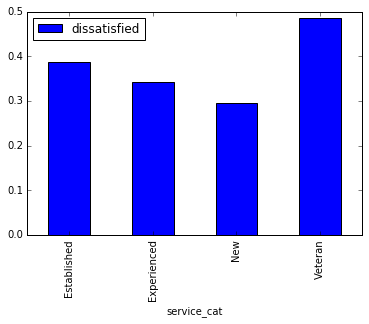

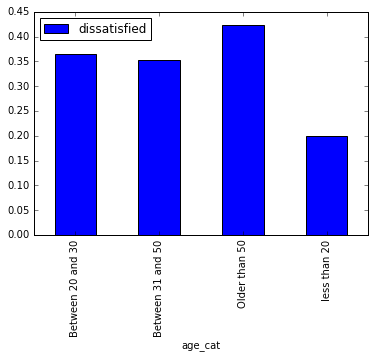

In [1341]:
dissatisfied_perc.plot(kind="bar")
dissatisfied_perc_age.plot(kind="bar")

In [1346]:
print(dissatisfied_perc)
print("\n")
print(dissatisfied_perc_age)


             dissatisfied
service_cat              
Established      0.386667
Experienced      0.343023
New              0.295337
Veteran          0.485294


                   dissatisfied
age_cat                        
Between 20 and 30      0.364341
Between 31 and 50      0.352617
Older than 50          0.422819
less than 20           0.200000


From the analysis above, we can conclude that employees who are older are more likely to resign due to dissatisfaction with the job. for example, 42% of the employees who resigned and are older than 50 mentionned dissatisfaction as the reason. In addition, employees with 7 or more years of service, Established 38%,  are more likely to resign due to dissatisfaction with the job.